# Explore here

Import Libraries

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#Seleccion de caracteristicas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# split
from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizacion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [98]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")

print(df.head())
print(df.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [100]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


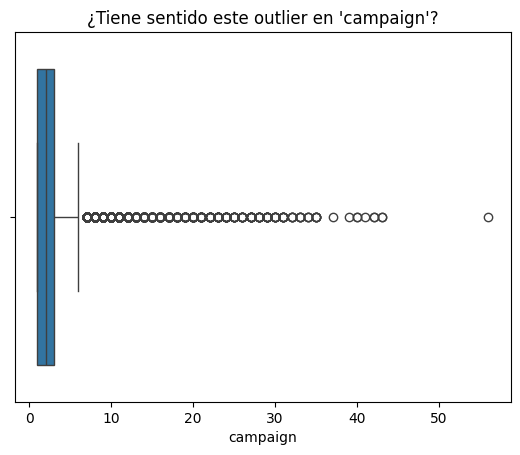

In [101]:
sns.boxplot(x=df['campaign'])
plt.title("¿Tiene sentido este outlier en 'campaign'?")
plt.show()

In [102]:
df[['campaign']].sort_values(by='campaign', ascending=False).head(10)

,campaign
4107,56
18728,43
13447,43
4168,42
5304,42
11033,41
18754,40
11769,40
4114,39
11593,37


In [103]:
df[df['campaign'] > 10][['campaign', 'duration', 'pdays', 'previous', 'y']].head(10)

,campaign,duration,pdays,previous,y
2189,11,10,999,0,no
2234,12,24,999,0,no
2554,13,101,999,0,no
2589,11,69,999,0,no
2590,11,15,999,0,no
2613,12,133,999,0,no
2631,19,69,999,0,no
2660,11,20,999,0,no
2735,12,488,999,0,no
2866,11,93,999,0,no


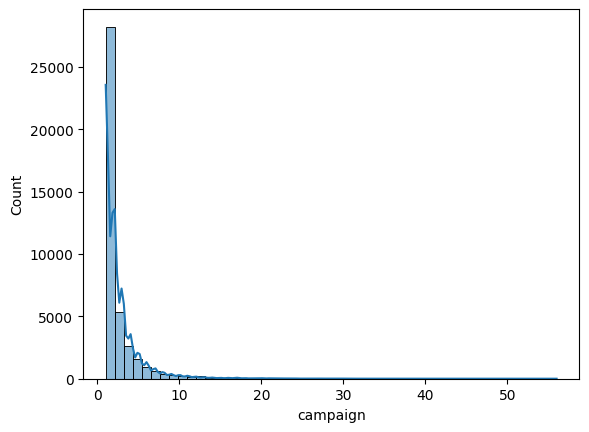

In [104]:
sns.histplot(df['campaign'], bins=50, kde=True)
plt.show()

In [105]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

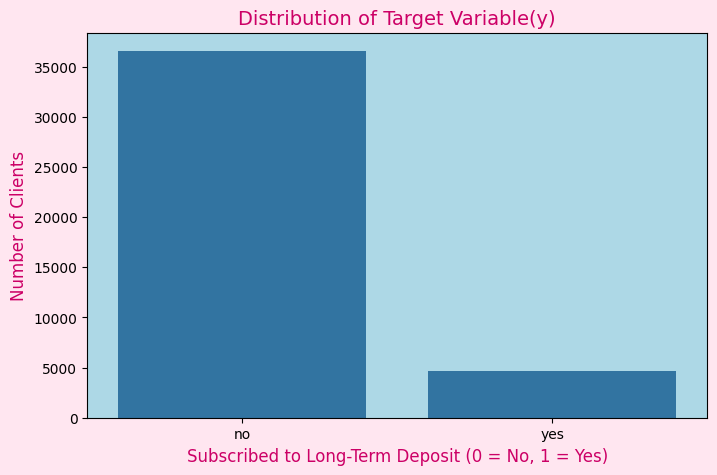

In [106]:

plt.figure(figsize=(8, 5), facecolor='#ffe6f0')
sns.countplot(data=df, x='y', hue='y', palette=['#ff66b2', '#ff99cc'], legend=False)


sns.countplot(data=df, x='y')
plt.title("Distribution of Target Variable(y)", fontsize=14, color='#cc0066')
plt.xlabel("Subscribed to Long-Term Deposit (0 = No, 1 = Yes)", fontsize=12, color='#cc0066')
plt.ylabel("Number of Clients", fontsize=12, color='#cc0066')

plt.gca().set_facecolor('lightblue')
plt.show()

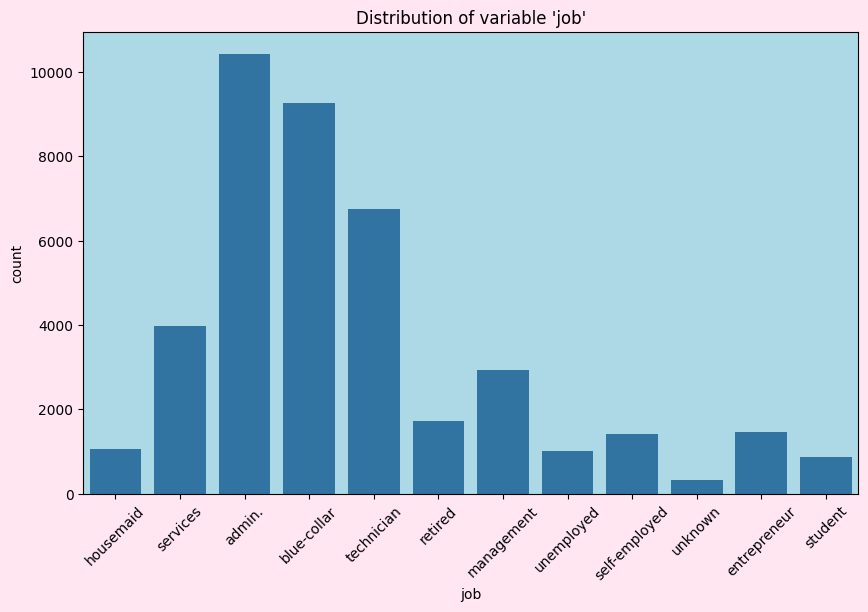

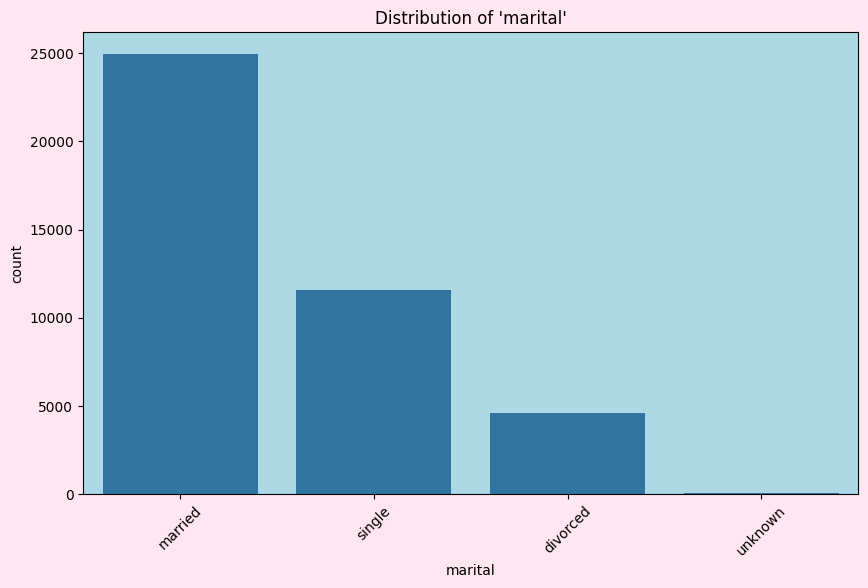

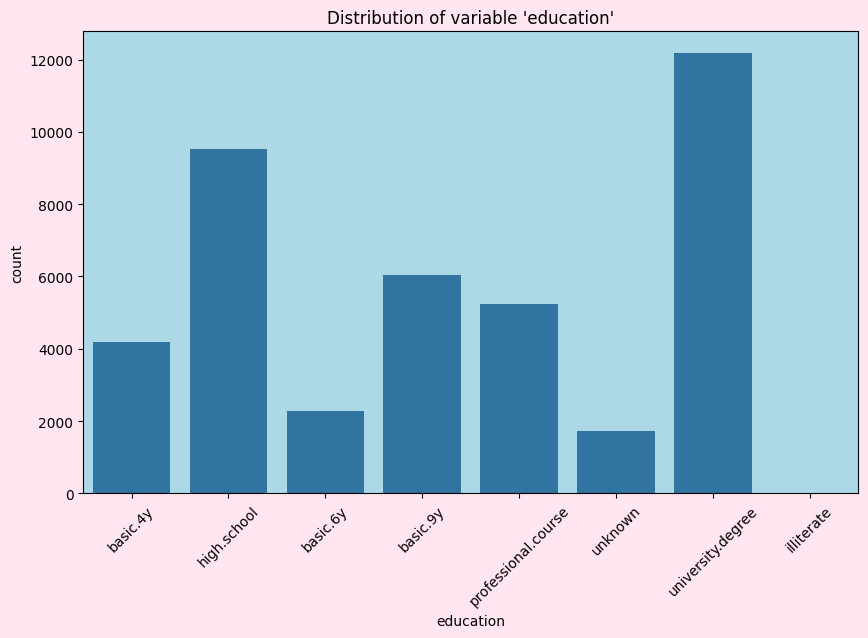

In [107]:

plt.figure(figsize=(10, 6), facecolor='#ffe6f0')
sns.countplot(data=df, x='job')
plt.title("Distribution of variable 'job'")
plt.xticks(rotation=45)

plt.gca().set_facecolor('lightblue')
plt.show()

# Visualization of variable 'marital'
plt.figure(figsize=(10,6), facecolor='#ffe6f0')
sns.countplot(data=df, x='marital')
plt.title("Distribution of 'marital'")
plt.xticks(rotation=45)
plt.gca().set_facecolor('lightblue')
plt.show()

# Visualization of variable  'education'
plt.figure(figsize=(10,6), facecolor='#ffe6f0')
sns.countplot(data=df, x='education')
plt.title("Distribution of variable 'education'")
plt.xticks(rotation=45)
plt.gca().set_facecolor('lightblue')
plt.show()


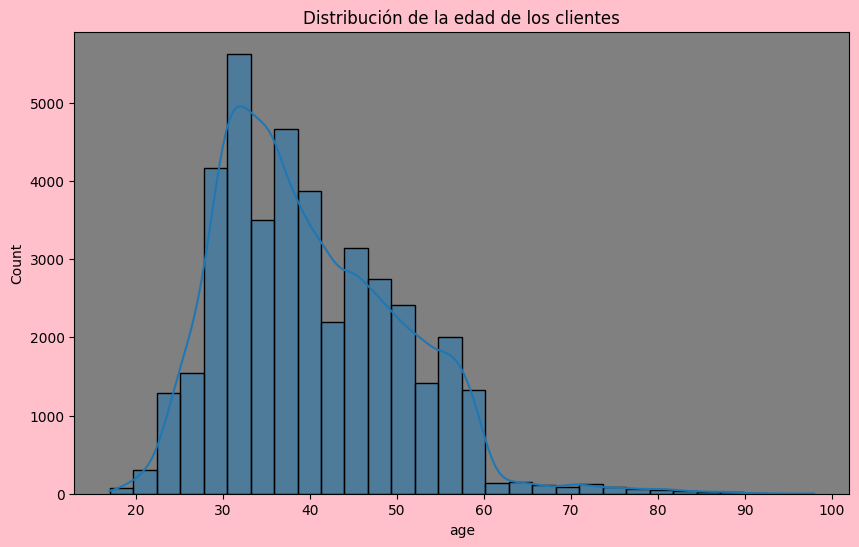

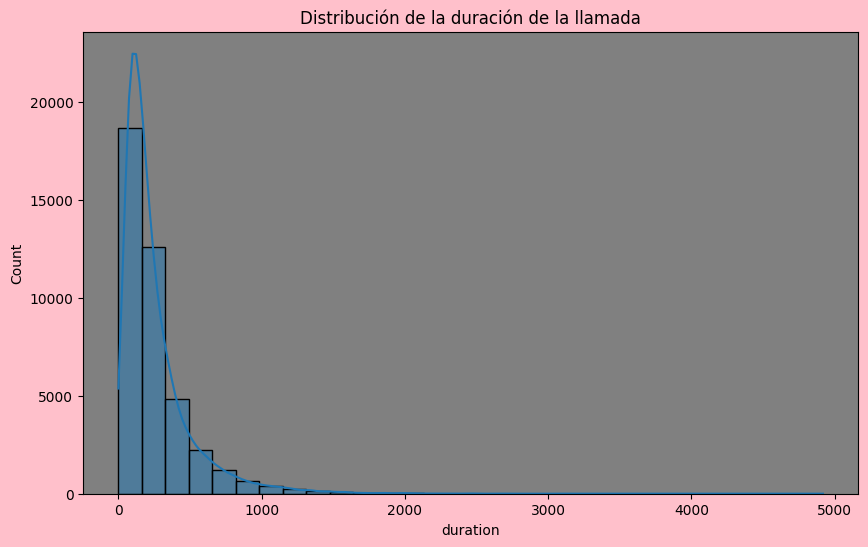

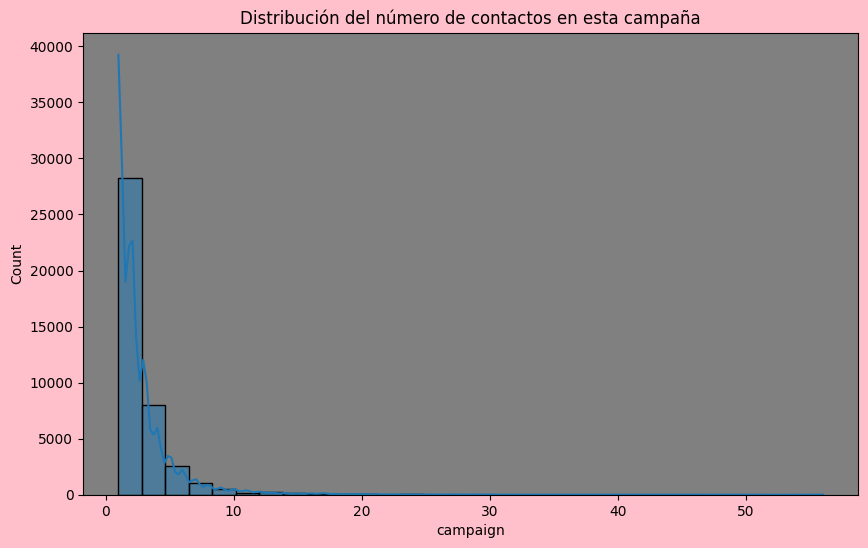

In [108]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Distribución de la edad de los clientes")

plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'duration' (duración de la llamada)
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['duration'], kde=True, bins=30)
plt.title("Distribución de la duración de la llamada")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'campaign'
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['campaign'], kde=True, bins=30)
plt.title("Distribución del número de contactos en esta campaña")
plt.gca().set_facecolor('grey')
plt.show()



Data Cleaning & Preprocessing

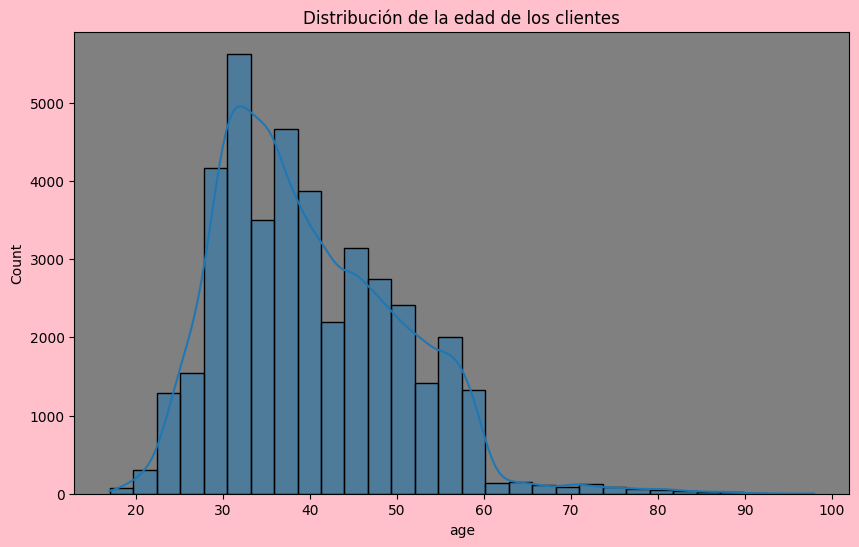

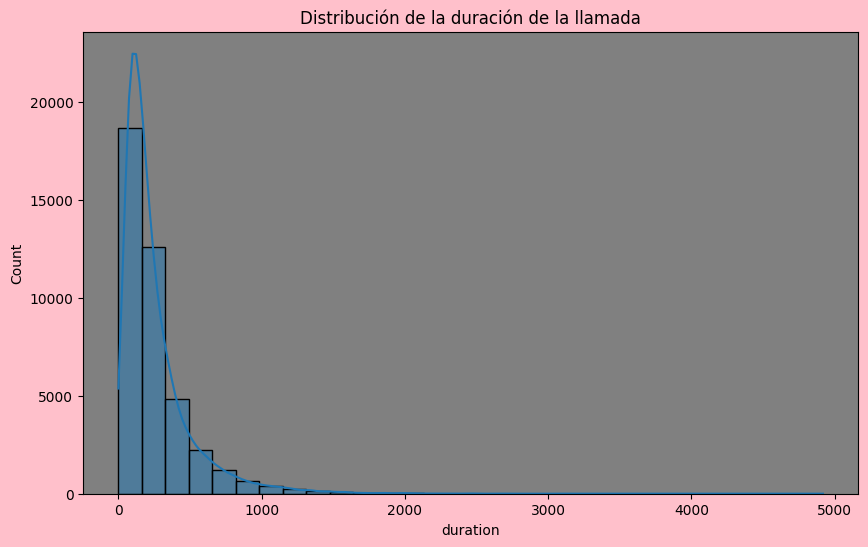

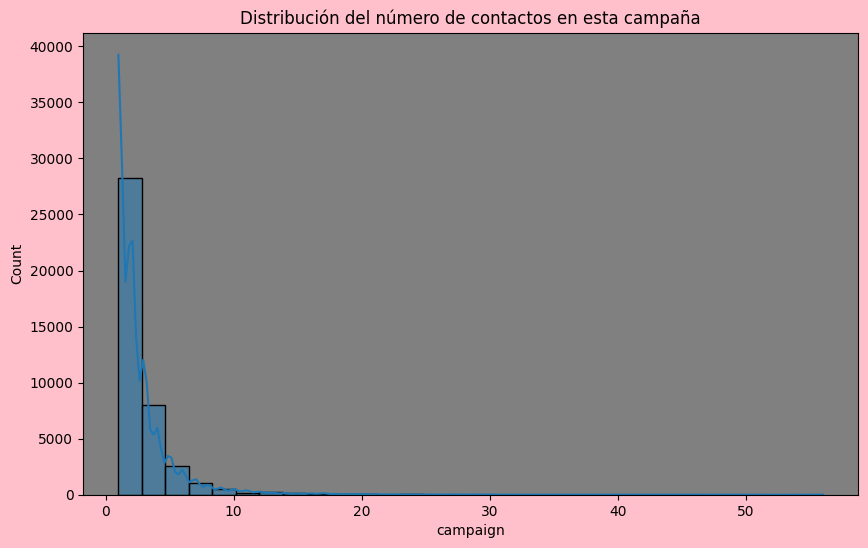

In [109]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Distribución de la edad de los clientes")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'duration' (duración de la llamada)
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['duration'], kde=True, bins=30)
plt.title("Distribución de la duración de la llamada")
plt.gca().set_facecolor('grey')
plt.show()

# Histograma de la variable 'campaign'
plt.figure(figsize=(10,6), facecolor='pink')
sns.histplot(df['campaign'], kde=True, bins=30)
plt.title("Distribución del número de contactos en esta campaña")
plt.gca().set_facecolor('grey')
plt.show()

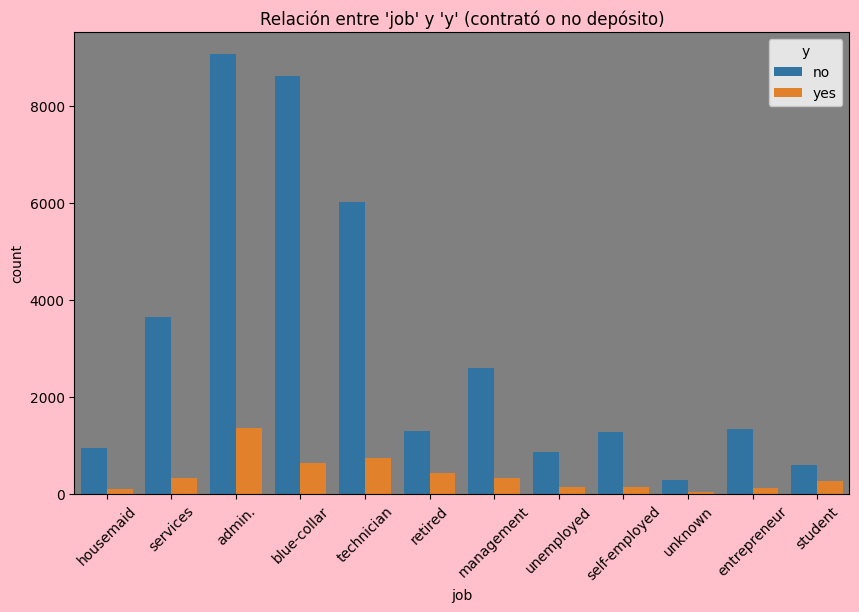

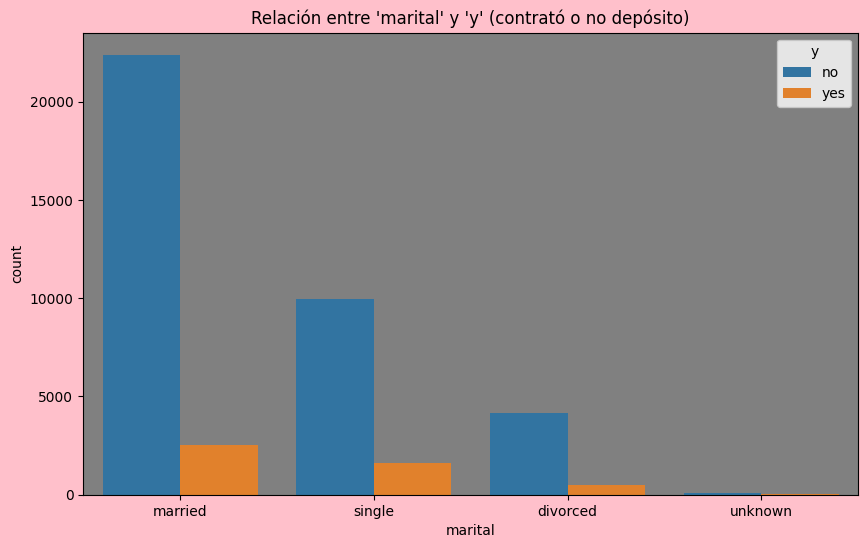

In [110]:
plt.figure(figsize=(10,6), facecolor='pink')
sns.countplot(data=df, x='job', hue='y')
plt.title("Relación entre 'job' y 'y' (contrató o no depósito)")
plt.xticks(rotation=45)

plt.gca().set_facecolor('grey')
plt.show()

# Relación entre la variable 'marital' y la variable objetivo 'y'
plt.figure(figsize=(10,6), facecolor='pink')
sns.countplot(data=df, x='marital', hue='y')
plt.title("Relación entre 'marital' y 'y' (contrató o no depósito)")

plt.gca().set_facecolor('grey')
plt.show()

Data Cleaning and Preprocessing

In [111]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

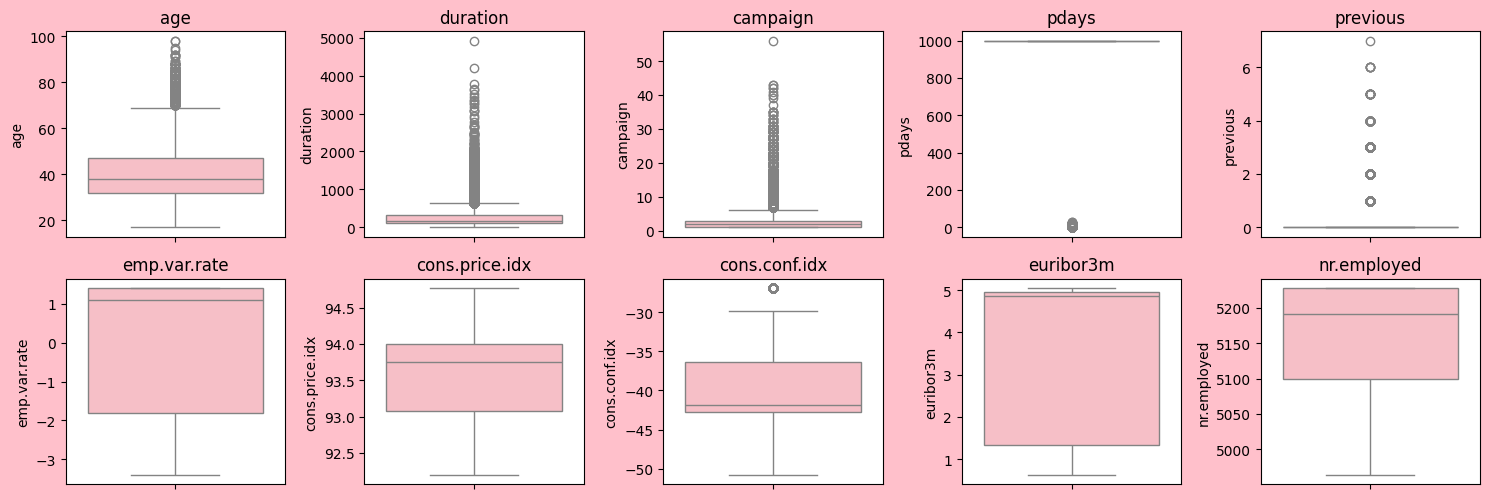

In [112]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10), facecolor='pink')
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, y=col, color="#ffb6c1")
    plt.title(col)
    plt.tight_layout()
plt.show()

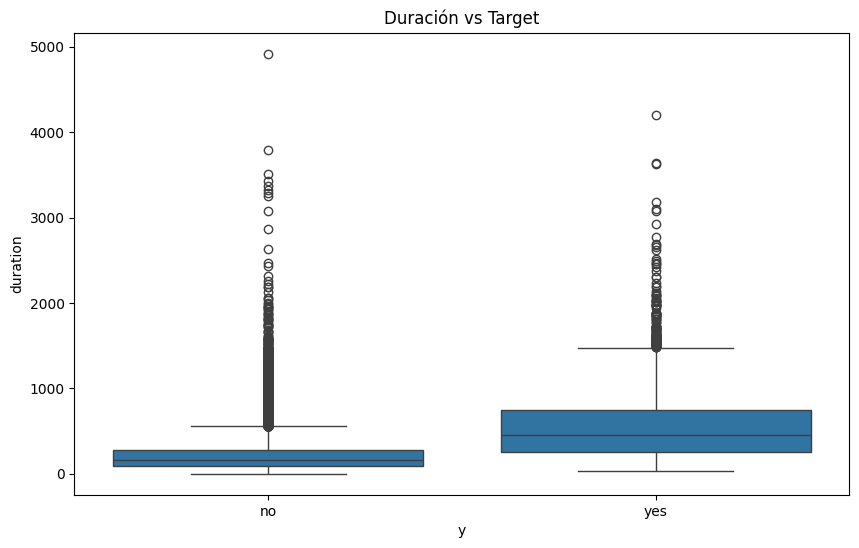

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title("Duración vs Target")
plt.show()

In [114]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [115]:
for col in ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    median = df[col].median()
    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

Se eliminan valores atípicos por edad avanzada poco representativa para el objetivo de captación a largo plazo.

In [116]:
df = df[df['age'] <= 70]

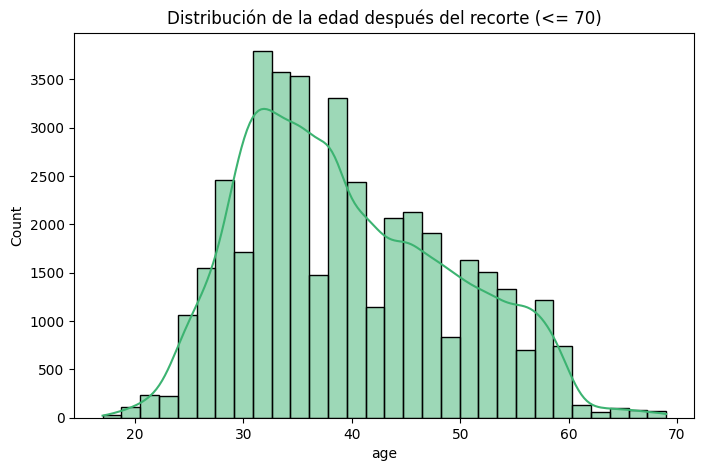

Máxima edad ahora: 69.0


In [117]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de la edad después del recorte (<= 70)")
plt.show()

print("Máxima edad ahora:", df['age'].max())

In [118]:
df = df[df['duration'] <= 1000]

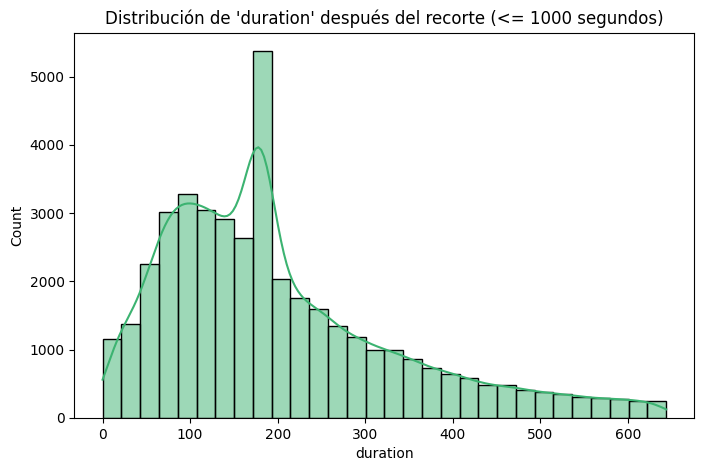

Máxima duración ahora: 644.0


In [119]:
plt.figure(figsize=(8, 5))
sns.histplot(df['duration'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de 'duration' después del recorte (<= 1000 segundos)")
plt.show()

print("Máxima duración ahora:", df['duration'].max())

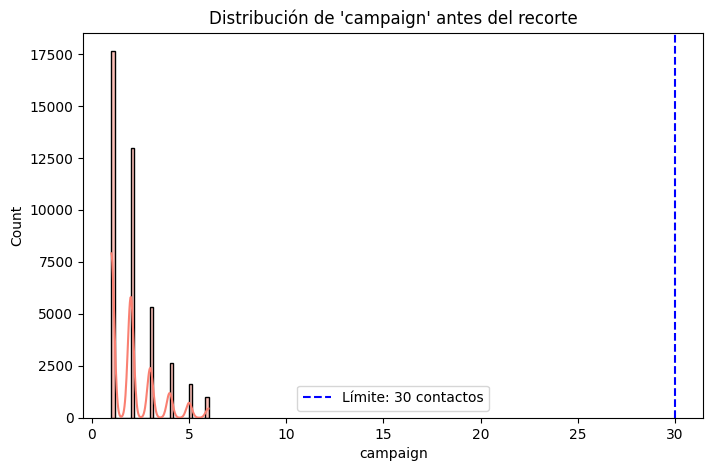

In [120]:
plt.figure(figsize=(8, 5))
sns.histplot(df['campaign'], bins=30, kde=True, color='salmon')
plt.axvline(30, color='blue', linestyle='--', label='Límite: 30 contactos')
plt.title("Distribución de 'campaign' antes del recorte")
plt.legend()
plt.show()

In [121]:
df = df[df['campaign'] <= 30]

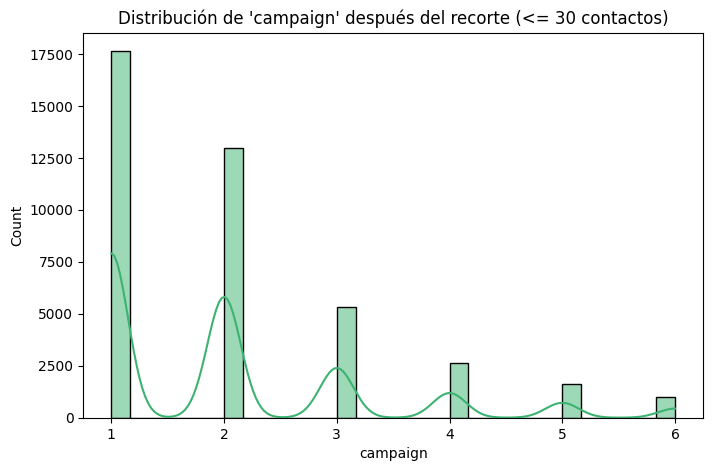

Máximo número de contactos ahora: 6.0


In [122]:
plt.figure(figsize=(8, 5))
sns.histplot(df['campaign'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de 'campaign' después del recorte (<= 30 contactos)")
plt.show()

print("Máximo número de contactos ahora:", df['campaign'].max())

In [123]:
df.drop(columns=["month", "day_of_week"], inplace=True)

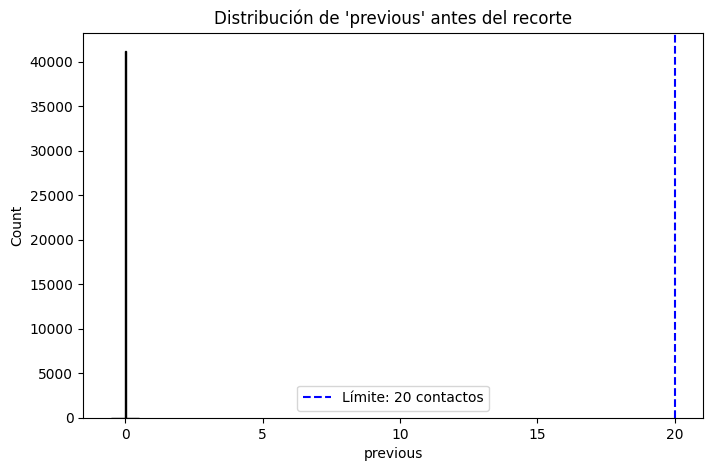

In [124]:
plt.figure(figsize=(8, 5))
sns.histplot(df['previous'], bins=30, kde=True, color='salmon')
plt.axvline(20, color='blue', linestyle='--', label='Límite: 20 contactos')
plt.title("Distribución de 'previous' antes del recorte")
plt.legend()
plt.show()


In [125]:
df = df[df['previous'] <= 20]

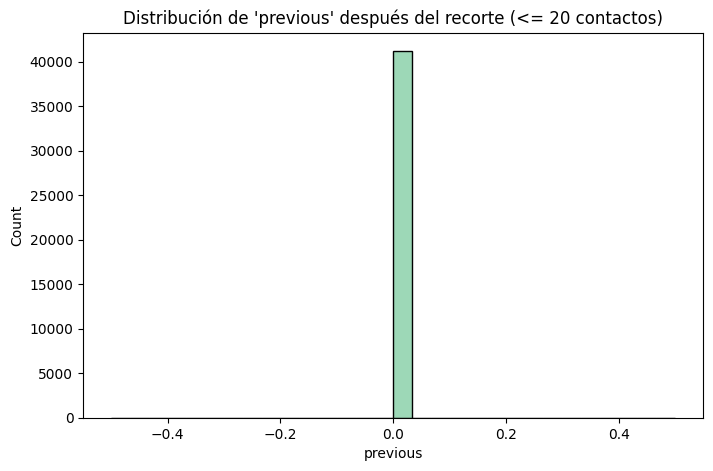

Máximo número de contactos anteriores ahora: 0.0


In [126]:
plt.figure(figsize=(8, 5))
sns.histplot(df['previous'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribución de 'previous' después del recorte (<= 20 contactos)")
plt.show()

print("Máximo número de contactos anteriores ahora:", df['previous'].max())

In [127]:
from sklearn.preprocessing import MinMaxScaler

df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['default'] = pd.factorize(df['default'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['contact'] = pd.factorize(df['contact'])[0]
df['poutcome'] = pd.factorize(df['poutcome'])[0]
df['y'] = pd.factorize(df['y'])[0]

X = df.drop(columns=['y'])
y = df['y']



In [128]:
X = X.select_dtypes(include=[np.number])
X = X - X.min() 

Escalado

In [129]:

num_variables = df.select_dtypes(include=[np.number]).columns
df[num_variables] = df[num_variables].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,poutcome,emp.var.rate,euribor3m,nr.employed
0,94.0,0.0,4.8,4.326,264.5
1,116.0,0.0,1.6,0.610,135.5
2,13.0,1.0,1.6,0.720,135.5
3,94.0,0.0,4.8,4.327,264.5
4,344.0,0.0,4.5,4.226,227.4


In [130]:
X_test_sel.head()

,duration,poutcome,emp.var.rate,euribor3m,nr.employed
0,371.0,1.0,1.6,0.665,135.5
1,285.0,0.0,4.5,4.226,227.4
2,52.0,1.0,1.6,0.679,135.5
3,355.0,0.0,4.8,4.333,264.5
4,189.0,0.0,4.8,4.329,264.5


Feature Selection & Target Definition.

In [131]:
X = df.drop(columns=['y'])  
y = df['y'] 

Train-Test Split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño total de los datos: {df.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño de la variable objetivo de entrenamiento (y_train): {y_train.shape}")

Tamaño total de los datos: (41188, 19)
Tamaño del conjunto de prueba (X_test): (8238, 18)
Tamaño del conjunto de entrenamiento (X_train): (32950, 18)
Tamaño de la variable objetivo de entrenamiento (y_train): (32950,)


Model training

In [133]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [134]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,duration,poutcome,emp.var.rate,euribor3m,nr.employed,y_n
0,94.0,0.0,4.8,4.326,264.5,0.0
1,116.0,0.0,1.6,0.610,135.5,0.0
2,13.0,1.0,1.6,0.720,135.5,0.0
3,94.0,0.0,4.8,4.327,264.5,0.0
4,344.0,0.0,4.5,4.226,227.4,0.0


In [135]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [136]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [137]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(8238,))

In [138]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con las características seleccionadas: {accuracy:.2f}")
accuracy

Accuracy del modelo con las características seleccionadas: 0.90


0.8991260014566642

In [139]:
cm = confusion_matrix(y_test, y_pred)

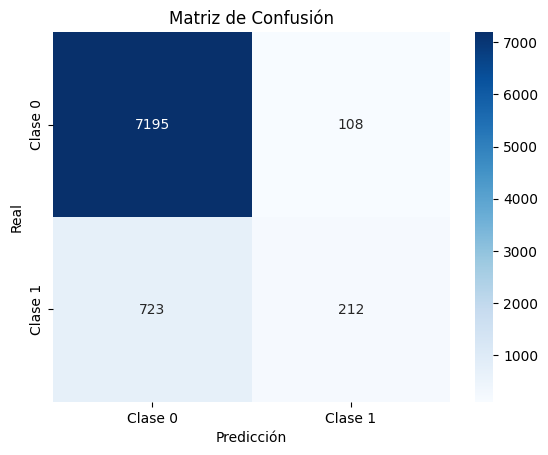

In [140]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
hyperparams =  {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]  # Compatibles con l1 y l2
}
model = LogisticRegression(max_iter=1000)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparams,
    n_iter=20,        # Probará 20 combinaciones aleatorias
    scoring="accuracy",
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparams,  # Cambié 'hyperparams' aquí
    n_iter=20,                        # Probará 20 combinaciones aleatorias
    scoring="accuracy",
    cv=5,                             # 5-fold cross-validation
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Ver los valores numéricos de la matriz de confusión
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[7195  108]
 [ 723  212]]


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(8238,))

In [ ]:
accuracy_score(y_test, y_pred)

0.8991260014566642

In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))